# **IPL player analysis model**

The IPL Player Analysis Model is a predictive analytics tool designed to evaluate and select cricket players for the upcoming Indian Premier League (IPL) auction in 2025. This model utilizes historical performance data, player statistics, and machine learning techniques to identify players who have the potential to deliver exceptional performance in the upcoming season.

# **Team analysis**

Before the player the opponent analysis the team should be analysed

In [32]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#Load data sets
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [34]:
#Print deliveries
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [35]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [36]:
#Print matches
matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [37]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [38]:
# Cleaning the deliveries dataset
deliveries['extras_type'] = deliveries['extras_type'].fillna('None')
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('None')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('None')
deliveries['fielder'] = deliveries['fielder'].fillna('None')

In [39]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [40]:
# Cleaning the matches dataset
matches['city'] = matches['city'].fillna('Unknown')
matches['result_margin'] = matches['result_margin'].fillna(0)
matches['target_runs'] = matches['target_runs'].fillna(0)
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['method'] = matches['method'].fillna('Normal')

In [41]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [42]:
# Renaming 'id' to 'match_id' in matches dataset for merging
matches.rename(columns={'id': 'match_id'}, inplace=True)

In [43]:
# Merging the datasets on 'match_id'
merged_data = pd.merge(deliveries, matches, how='inner', on='match_id')

In [44]:
merged_data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,Normal,J Madanagopal,Nitin Menon
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,Normal,J Madanagopal,Nitin Menon
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,Normal,J Madanagopal,Nitin Menon
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,Normal,J Madanagopal,Nitin Menon


In [45]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       260920 non-null  object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  260920 non-null  object 
 15  dismissal_kind    260920 non-null  object 
 16  fielder           26

In [46]:
merged_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen


In [47]:
# Calculate the number of matches each team has played
team_matches_played = merged_data.groupby('team1')['match_id'].nunique() + merged_data.groupby('team2')['match_id'].nunique()
team_matches_played

team1
Chennai Super Kings            238
Deccan Chargers                 75
Delhi Capitals                  91
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  45
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          251
Lucknow Super Giants            44
Mumbai Indians                 261
Pune Warriors                   46
Punjab Kings                    56
Rajasthan Royals               221
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    240
Royal Challengers Bengaluru     15
Sunrisers Hyderabad            182
Name: match_id, dtype: int64

In [48]:
# Calculate the number of matches each team has won
team_wins = merged_data.groupby('winner')['match_id'].nunique()
team_wins

winner
Chennai Super Kings            138
Deccan Chargers                 29
Delhi Capitals                  48
Delhi Daredevils                67
Gujarat Lions                   13
Gujarat Titans                  28
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders          131
Lucknow Super Giants            24
Mumbai Indians                 144
Pune Warriors                   12
Punjab Kings                    24
Rajasthan Royals               112
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore    116
Royal Challengers Bengaluru      7
Sunrisers Hyderabad             88
Name: match_id, dtype: int64

In [49]:
# Calculate the winning percentage
team_win_percentage = (team_wins / team_matches_played) * 100
team_win_percentage.round(2)

winner
Chennai Super Kings            57.98
Deccan Chargers                38.67
Delhi Capitals                 52.75
Delhi Daredevils               41.61
Gujarat Lions                  43.33
Gujarat Titans                 62.22
Kings XI Punjab                46.32
Kochi Tuskers Kerala           42.86
Kolkata Knight Riders          52.19
Lucknow Super Giants           54.55
Mumbai Indians                 55.17
Pune Warriors                  26.09
Punjab Kings                   42.86
Rajasthan Royals               50.68
Rising Pune Supergiant         62.50
Rising Pune Supergiants        35.71
Royal Challengers Bangalore    48.33
Royal Challengers Bengaluru    46.67
Sunrisers Hyderabad            48.35
Name: match_id, dtype: float64

In [50]:
# Sort by winning percentage
team_win_percentage = team_win_percentage.sort_values(ascending=False)
team_win_percentage.round(2)

winner
Rising Pune Supergiant         62.50
Gujarat Titans                 62.22
Chennai Super Kings            57.98
Mumbai Indians                 55.17
Lucknow Super Giants           54.55
Delhi Capitals                 52.75
Kolkata Knight Riders          52.19
Rajasthan Royals               50.68
Sunrisers Hyderabad            48.35
Royal Challengers Bangalore    48.33
Royal Challengers Bengaluru    46.67
Kings XI Punjab                46.32
Gujarat Lions                  43.33
Kochi Tuskers Kerala           42.86
Punjab Kings                   42.86
Delhi Daredevils               41.61
Deccan Chargers                38.67
Rising Pune Supergiants        35.71
Pune Warriors                  26.09
Name: match_id, dtype: float64

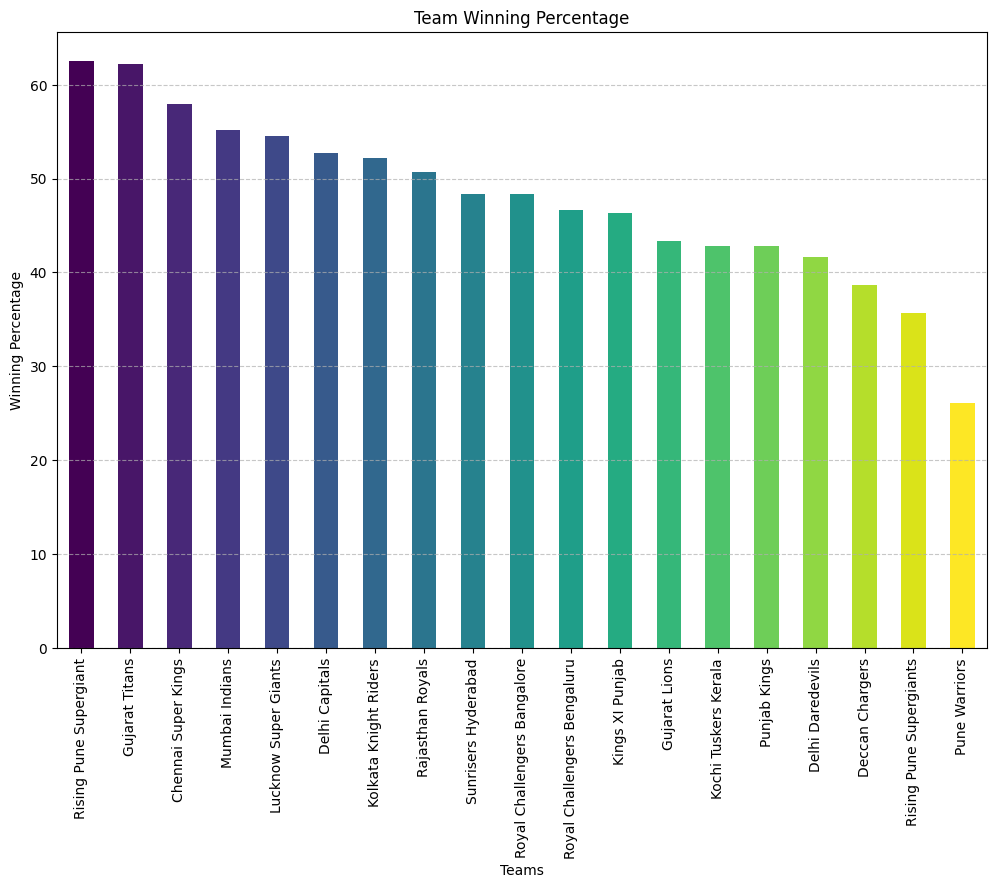

In [55]:
# Plot the winning percentage
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(team_win_percentage)))
team_win_percentage.plot(kind='bar', color=colors)
plt.title('Team Winning Percentage')
plt.xlabel('Teams')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Player analysis**

Player analysis from 2008-2014

In [56]:
# Calculate total runs scored by each batsman
batsman_runs = merged_data.groupby('batter')['batsman_runs'].sum()
batsman_runs

batter
A Ashish Reddy     280
A Badoni           634
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yashpal Singh       47
Younis Khan          3
Yudhvir Singh       22
Yuvraj Singh      2754
Z Khan             117
Name: batsman_runs, Length: 673, dtype: int64

In [57]:
# Get the top 10 batsmen
top_batsmen = batsman_runs.sort_values(ascending=False).head(10)
top_batsmen

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

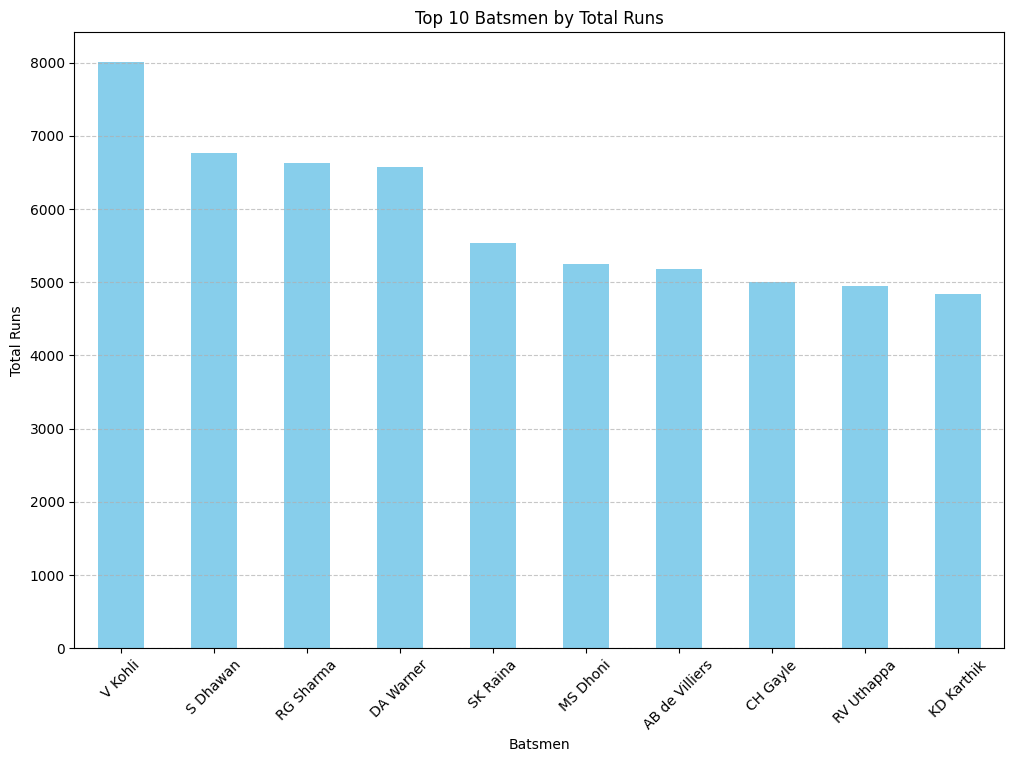

In [58]:
# Plot the top 10 batsmen
plt.figure(figsize=(12, 8))
top_batsmen.plot(kind='bar', color='skyblue')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
# Filter deliveries where a wicket has fallen
wickets = merged_data[merged_data['is_wicket'] == 1]
wickets

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
131,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,I Sharma,W Jaffer,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
138,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,AB Dinda,W Jaffer,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260826,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,14,1,H Klaasen,Harshit Rana,PJ Cummins,0,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,Normal,J Madanagopal,Nitin Menon
260848,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,Normal,J Madanagopal,Nitin Menon
260852,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,PJ Cummins,AD Russell,B Kumar,0,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,Normal,J Madanagopal,Nitin Menon
260861,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,1,2,SP Narine,PJ Cummins,Rahmanullah Gurbaz,0,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,Normal,J Madanagopal,Nitin Menon


In [60]:
# Calculate total wickets taken by each bowler
bowler_wickets = wickets.groupby('bowler')['is_wicket'].sum()
bowler_wickets

bowler
A Ashish Reddy     19
A Badoni            2
A Chandila         11
A Choudhary         5
A Flintoff          2
                 ... 
Yash Dayal         31
Yash Thakur        27
Yudhvir Singh       4
Yuvraj Singh       39
Z Khan            119
Name: is_wicket, Length: 455, dtype: int64

In [61]:
# Get the top 10 bowlers
top_bowlers = bowler_wickets.sort_values(ascending=False).head(10)
top_bowlers

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64

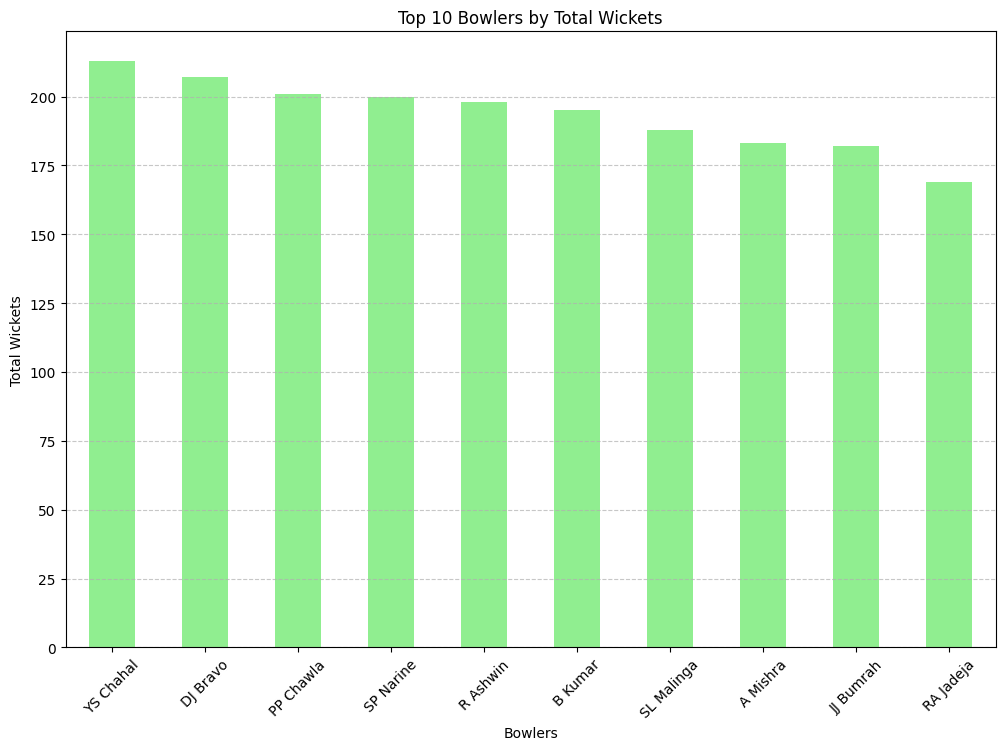

In [62]:
# Plot the top 10 bowlers
plt.figure(figsize=(12, 8))
top_bowlers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowlers')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

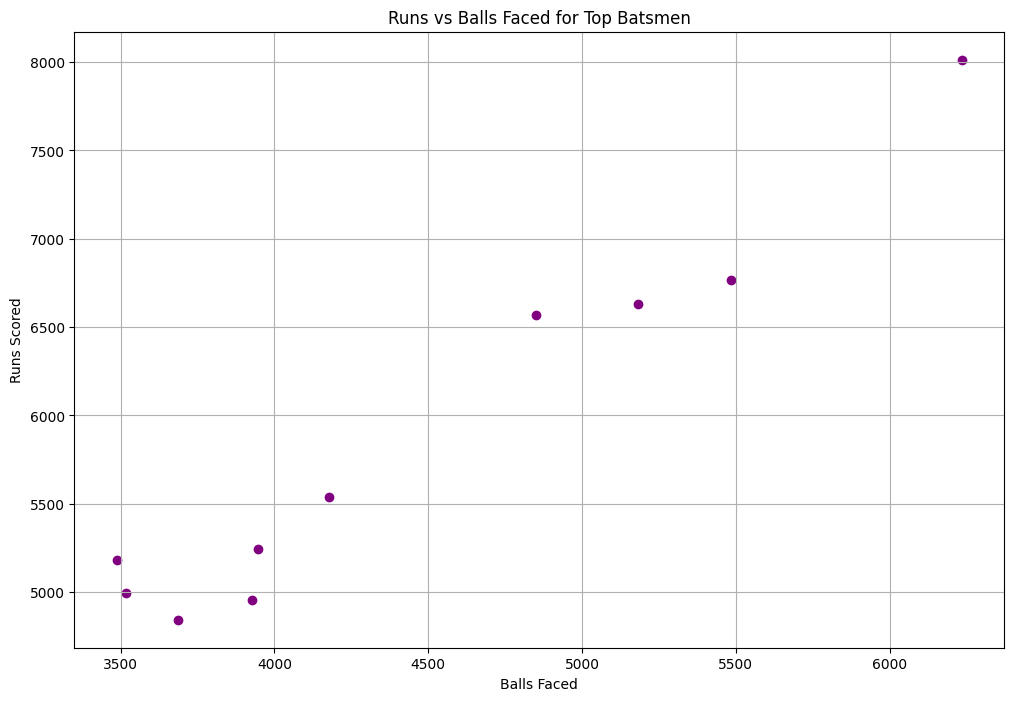

In [63]:
# Scatter plot: Runs vs Balls Faced for Top Batsmen
top_batsmen_data = merged_data[merged_data['batter'].isin(top_batsmen.index)]
batsman_runs_balls = top_batsmen_data.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'}).reset_index()
plt.figure(figsize=(12, 8))
plt.scatter(batsman_runs_balls['ball'], batsman_runs_balls['batsman_runs'], color='purple')
plt.title('Runs vs Balls Faced for Top Batsmen')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.show()

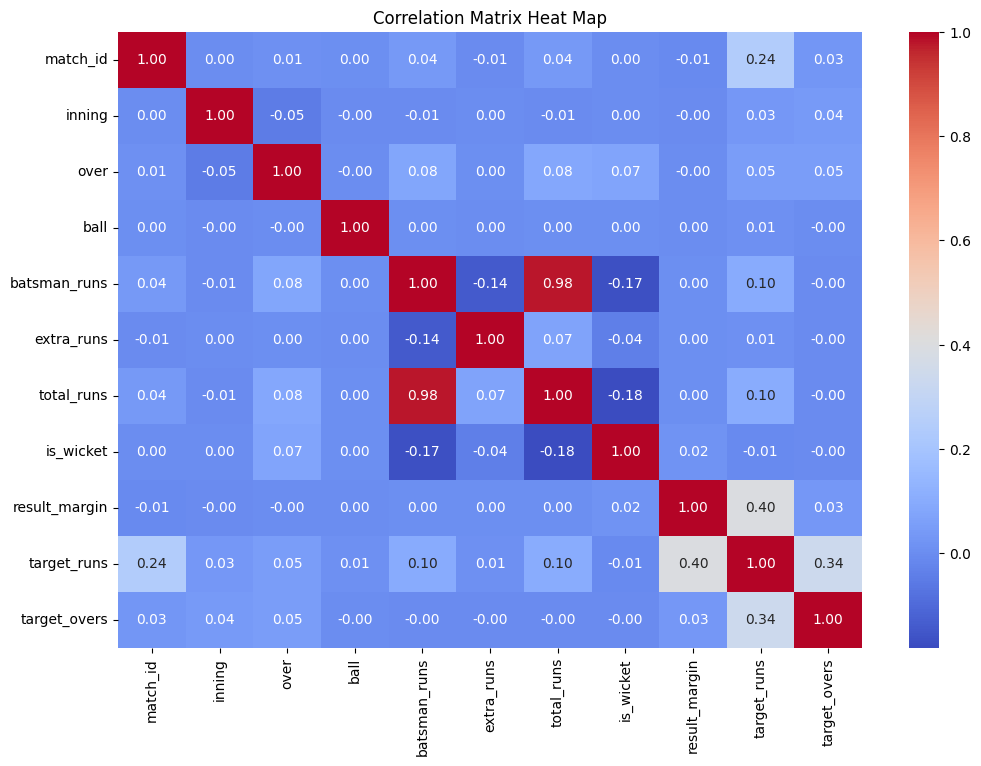

In [64]:
# Heat Map: Correlation Matrix
numeric_columns = merged_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heat Map')
plt.show()

C:\Users\psv102\AppData\Local\Temp\ipykernel_9284\1356277291.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_century_players, x='batter', y='batsman_runs', palette='viridis')


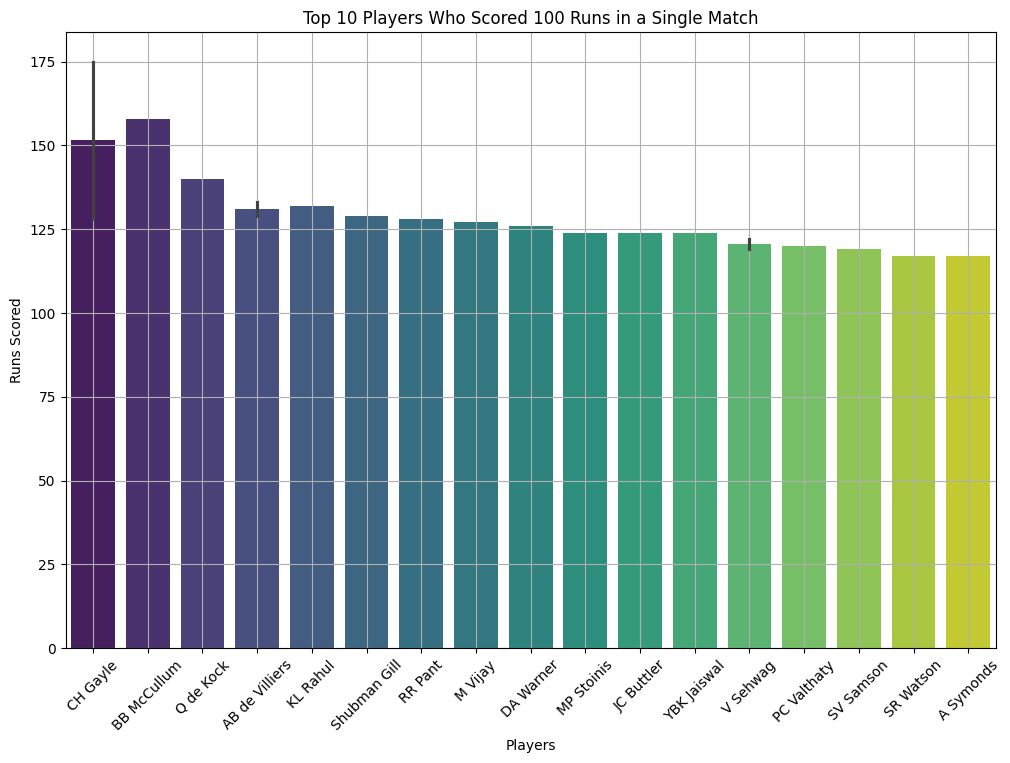

In [31]:
# Player Analysis: Players Who Scored 100 Runs
century_players = merged_data.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
century_players = century_players[century_players['batsman_runs'] >= 100]

# Get the top 20 players who scored 100 runs
top_century_players = century_players.sort_values(by='batsman_runs', ascending=False).head(20)

# Plot the top 20 players who scored 100 runs
plt.figure(figsize=(12, 8))
sns.barplot(data=top_century_players, x='batter', y='batsman_runs', palette='viridis')
plt.title('Top 10 Players Who Scored 100 Runs in a Single Match')
plt.xlabel('Players')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()